Player1 Strokes

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

df=pd.read_csv('/home/smartcoach/Fady/smartcoach/src/player1StrockType.csv',index_col=False)
#df=df.head(1).T
df.rename(columns = {'0':'Frame_NUM','1':'player1_stroks'}, inplace = True)
#df=df.drop('Unnamed: 0')



In [3]:
df

,Frame_NUM,player1_stroks
0,16,serve
1,105,serve and returned
2,313,backhand
3,422,serve and returned
4,561,backhand
5,733,backhand
6,897,backhand
7,1087,serve and returned
8,1199,serve and returned
9,1321,serve and returned


In [7]:
df['player1_stroks'].count()

33

In [8]:
str_list=list(df['player1_stroks'])
print(len(str_list))

33


In [160]:
str_list=list(df['player1_stroks'])

for x in range(len(str_list)):
  if x+1<len(str_list):
   if str_list[x]=='serve and returned' and str_list[x+1]=='serve and returned':
        str_list[x]='Out'      
df['player1_stroks']=str_list

In [9]:

df

,Frame_NUM,player1_stroks
0,16,serve
1,105,serve and returned
2,313,backhand
3,422,serve and returned
4,561,backhand
5,733,backhand
6,897,backhand
7,1087,serve and returned
8,1199,serve and returned
9,1321,serve and returned


In [10]:
df_grouped=df.groupby(['player1_stroks'])['player1_stroks'].count()
df_grouped

player1_stroks
backhand              10
forehand               6
serve                  4
serve and returned    13
Name: player1_stroks, dtype: int64

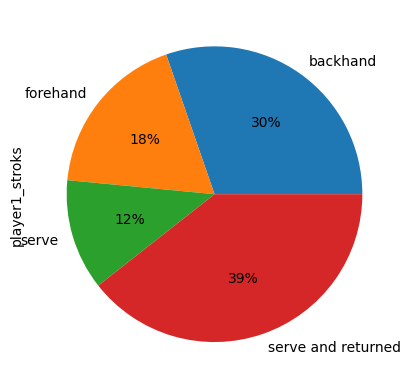

In [11]:
df_grouped.plot(kind = 'pie',autopct='%1.0f%%')
plt.savefig('player1 strokes.png')

----------------------------------------------------------------------------------------------------

Cross or Straight

player1

In [12]:
player1cros = pd.read_csv("player1CorS.csv",index_col=False)
player1cros.rename(columns = {'0':'Frame_NUM','1':'player1_stroks_type'}, inplace = True)
player1cros

,Frame_NUM,player1_stroks_type
0,16,cross
1,105,cross
2,313,straight
3,422,cross
4,561,cross
5,733,straight
6,897,cross
7,1087,cross
8,1199,cross
9,1321,cross


In [14]:
corsses = player1cros["player1_stroks_type"].value_counts()
corsses

cross       26
straight     7
Name: player1_stroks_type, dtype: int64

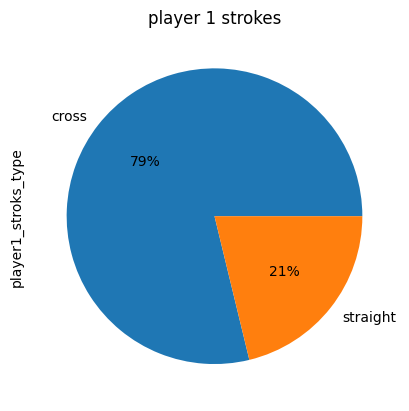

In [15]:
corsses.plot(kind='pie', title="player 1 strokes" , autopct='%1.0f%%' )
plt.savefig('player1 strokes type.png')

Player2

In [16]:
player2cros = pd.read_csv("player2CorS.csv",index_col=False)
player2cros.rename(columns = {'0':'Frame_NUM','1':'player2_stroks_type'}, inplace = True)
player2cros

,Frame_NUM,player2_stroks_type
0,230,straight
1,470,cross
2,652,straight
3,804,cross
4,969,straight
5,1134,cross
6,1267,straight
7,1364,cross
8,1467,cross
9,1609,cross


In [144]:
corsses = player2cros["player2_stroks_type"].value_counts()
corsses

cross       19
straight    11
Name: player2_stroks_type, dtype: int64

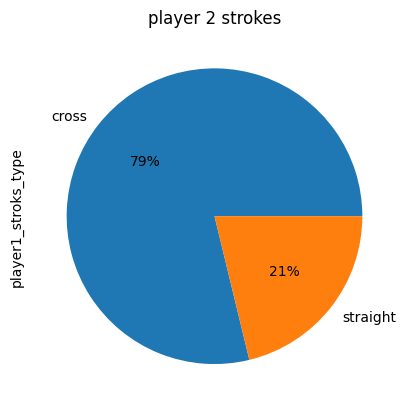

In [17]:
corsses.plot(kind='pie', title="player 2 strokes" , autopct='%1.0f%%' )
plt.savefig('player2 strokes type.png')

-----------------------------------------------------------------------------------------------

merge players data

In [19]:
merged_df=df.merge(player1cros,on='Frame_NUM')
merged_df.to_csv('player1.csv')
seaporn_df=pd.DataFrame(merged_df.groupby(['player1_stroks','player1_stroks_type']).count())
seaporn_df=seaporn_df.reset_index()
seaporn_df.rename(columns = {'player1_stroks':'Player1 Strokes','Frame_NUM':'Number of Strokes','player1_stroks_type':'StrokesType'}, inplace = True)




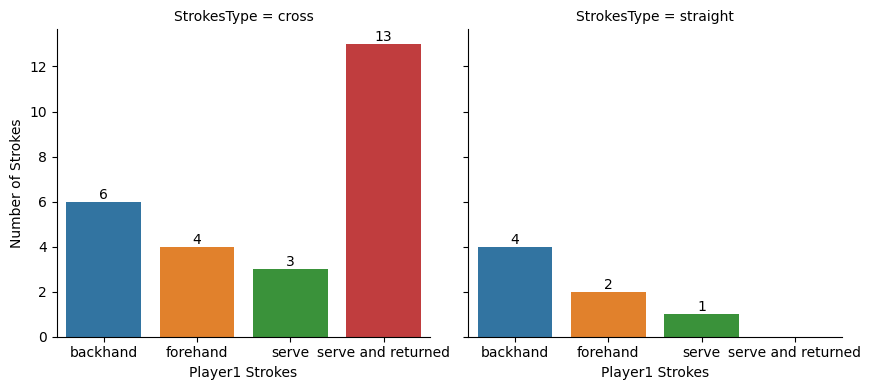

In [20]:
g=sns.catplot(
    data=seaporn_df, x="Player1 Strokes", y="Number of Strokes", col="StrokesType",
    kind="bar", height=4, aspect=1.1
          )

for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])          

plt.savefig('player1_plot.png') 

OCR 

In [1]:
import pandas as pd
df= pd.read_csv('ocr_players_score.csv')
df

,0,1,2,3,0.1,1.1,2.1,3.1
0,djokovic,30,65,30,nadal,s25,15,15
1,djokovic,30,65,30,nadal,s25,15,15
2,djokovic,30,65,30,nadal,s25,15,15
3,djokovic,30,65,30,nadal,s25,15,15
4,djokovic,30,65,30,nadal,s25,15,15
...,...,...,...,...,...,...,...,...
1970,djokovic,65,30,30,nadal,o25,15,15
1971,djokovic,65,30,30,nadal,o25,15,15
1972,djokovic,65,30,30,nadal,o25,15,15
1973,djokovic,65,30,30,nadal,o25,15,15


In [ ]:
 

df.columns
df1=df[['0', '1', '2', '3','4']]
""" df1['0']=df1['0'].fillna('nadal')
df1['1'].isna().sum()
 """
#df.fillna(method='bfill', inplace=True) 
df1



In [2]:
df['0'].unique()

array(['djokovic'], dtype=object)

In [3]:
df['1'].unique()

array([30, 65])

In [4]:
df['2'].unique()

array([65, 30])

In [5]:
df['3'].unique()

array([30])

In [6]:
df['0.1'].unique()

array(['nadal'], dtype=object)

In [9]:
df['3.1'].unique()


array([15])

In [10]:
df=df[['0','3','0.1','3.1']]
df


,0,3,0.1,3.1
0,djokovic,30,nadal,15
1,djokovic,30,nadal,15
2,djokovic,30,nadal,15
3,djokovic,30,nadal,15
4,djokovic,30,nadal,15
...,...,...,...,...
1970,djokovic,30,nadal,15
1971,djokovic,30,nadal,15
1972,djokovic,30,nadal,15
1973,djokovic,30,nadal,15


In [11]:
df.rename(columns = {'0':'player1', '3':'player1_score','0.1':'player2','3.1':'player2_score'}, inplace = True)
df


/tmp/ipykernel_2700090/2401254359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'0':'player1', '3':'player1_score','0.1':'player2','3.1':'player2_score'}, inplace = True)


,player1,player1_score,player2,player2_score
0,djokovic,30,nadal,15
1,djokovic,30,nadal,15
2,djokovic,30,nadal,15
3,djokovic,30,nadal,15
4,djokovic,30,nadal,15
...,...,...,...,...
1970,djokovic,30,nadal,15
1971,djokovic,30,nadal,15
1972,djokovic,30,nadal,15
1973,djokovic,30,nadal,15


In [12]:
df

,player1,player1_score,player2,player2_score
0,djokovic,30,nadal,15
1,djokovic,30,nadal,15
2,djokovic,30,nadal,15
3,djokovic,30,nadal,15
4,djokovic,30,nadal,15
...,...,...,...,...
1970,djokovic,30,nadal,15
1971,djokovic,30,nadal,15
1972,djokovic,30,nadal,15
1973,djokovic,30,nadal,15
